In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/basketball/nba.sqlite
/kaggle/input/basketball/csv/other_stats.csv
/kaggle/input/basketball/csv/draft_history.csv
/kaggle/input/basketball/csv/team_details.csv
/kaggle/input/basketball/csv/player.csv
/kaggle/input/basketball/csv/draft_combine_stats.csv
/kaggle/input/basketball/csv/team_info_common.csv
/kaggle/input/basketball/csv/common_player_info.csv
/kaggle/input/basketball/csv/team_history.csv
/kaggle/input/basketball/csv/game.csv
/kaggle/input/basketball/csv/game_summary.csv
/kaggle/input/basketball/csv/officials.csv
/kaggle/input/basketball/csv/game_info.csv
/kaggle/input/basketball/csv/line_score.csv
/kaggle/input/basketball/csv/play_by_play.csv
/kaggle/input/basketball/csv/team.csv
/kaggle/input/basketball/csv/inactive_players.csv


In [3]:
df=pd.read_csv("/kaggle/input/basketball/csv/draft_history.csv")
player=pd.read_csv('/kaggle/input/basketball/csv/player.csv')

In [4]:
# Read the data from the specified files
other_stats_df = pd.read_csv('/kaggle/input/basketball/csv/other_stats.csv')
team_details_df = pd.read_csv('/kaggle/input/basketball/csv/team_details.csv')
draft_combine_stats_df = pd.read_csv('/kaggle/input/basketball/csv/draft_combine_stats.csv')
team_info_common_df = pd.read_csv('/kaggle/input/basketball/csv/team_info_common.csv')
common_player_info_df = pd.read_csv('/kaggle/input/basketball/csv/common_player_info.csv')
team_history_df = pd.read_csv('/kaggle/input/basketball/csv/team_history.csv')
game_df = pd.read_csv('/kaggle/input/basketball/csv/game.csv')
game_summary_df = pd.read_csv('/kaggle/input/basketball/csv/game_summary.csv')
officials_df = pd.read_csv('/kaggle/input/basketball/csv/officials.csv')
game_info_df = pd.read_csv('/kaggle/input/basketball/csv/game_info.csv')
line_score_df = pd.read_csv('/kaggle/input/basketball/csv/line_score.csv')
play_by_play_df = pd.read_csv('/kaggle/input/basketball/csv/play_by_play.csv')
team_df = pd.read_csv('/kaggle/input/basketball/csv/team.csv')
inactive_players_df = pd.read_csv('/kaggle/input/basketball/csv/inactive_players.csv')

In [2]:
selected_columns = ['player_id', 'player_name', 'team_id', 'season']
game_df = game_df[selected_columns]

NameError: name 'game_df' is not defined

In [29]:
ex=df.head()

In [13]:
df.columns

Index(['person_id', 'player_name', 'season', 'round_number', 'round_pick',
       'overall_pick', 'draft_type', 'team_id', 'team_city', 'team_name',
       'team_abbreviation', 'organization', 'organization_type',
       'player_profile_flag'],
      dtype='object')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


In [4]:
df.drop("draft_type", axis=1)

,person_id,player_name,season,round_number,round_pick,overall_pick,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1641771,Jalen Slawson,2023,2,24,54,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
7986,1631209,Isaiah Wong,2023,2,25,55,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
7987,1641844,Tarik Biberovic,2023,2,26,56,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
7988,1631218,Trayce Jackson-Davis,2023,2,27,57,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


In [6]:
df.isnull().sum()

person_id               0
player_name             0
season                  0
round_number            0
round_pick              0
overall_pick            0
draft_type              0
team_id                 0
team_city               0
team_name               0
team_abbreviation       0
organization           19
organization_type      19
player_profile_flag     0
dtype: int64

<Axes: >

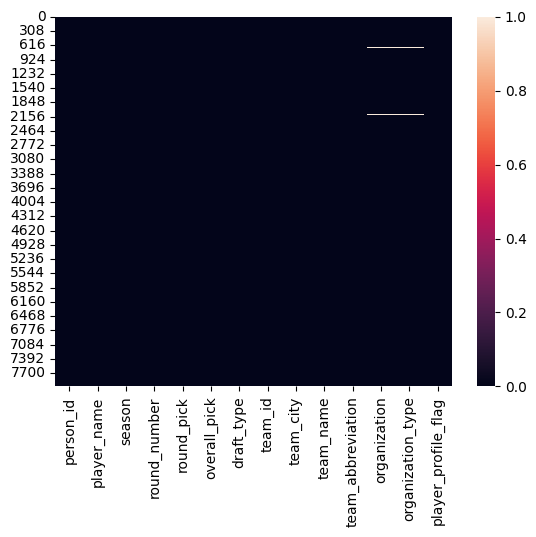

In [8]:
sns.heatmap(df.isnull())

In [12]:
df[df["player_name"].isin(["Tarik Biberovic"])]

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
7987,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1


In [16]:
df.query("player_name == 'Tarik Biberovic'")

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
7987,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1


In [18]:
df["season"].value_counts()

season
1970    239
1971    237
1984    228
1983    226
1982    225
       ... 
1993     54
1992     54
1991     54
1990     54
1989     54
Name: count, Length: 74, dtype: int64

In [25]:
df["team_name"].value_counts()

team_name
Hawks            479
Knicks           475
Warriors         453
Celtics          450
Pistons          428
Lakers           421
Bullets          415
76ers            353
Bulls            331
Suns             306
Royals           280
Trail Blazers    279
Rockets          275
Bucks            266
Cavaliers        262
SuperSonics      249
Kings            226
Jazz             196
Spurs            165
Pacers           160
Nets             158
Nuggets          156
Mavericks        147
Clippers         142
Nationals        117
Braves            94
Timberwolves      78
Magic             70
Hornets           66
Heat              58
Grizzlies         54
Wizards           47
Raptors           42
Thunder           39
Olympians         36
Capitols          33
Stags             32
Bombers           24
Steamrollers      24
Pelicans          22
Bobcats           20
Zephyrs           15
Packers           15
Blackhawks        10
Jets              10
Ironmen            7
Huskies            5
Nam

In [39]:
df_year=df["overall_pick"]
df_year

0        1
1        2
2        3
3        4
4        5
        ..
7985    54
7986    55
7987    56
7988    57
7989    58
Name: overall_pick, Length: 7990, dtype: int64

In [11]:
# v = ["a", "e", "i", "o", "u"]
# string = "imaofjf sjjfed"
# count = 0
# for s in string:
#     if s in v:
#         count += 1
# print(count)

2


<Axes: xlabel='season'>

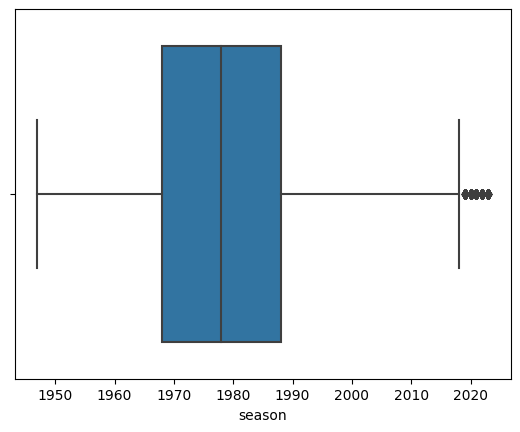

In [6]:
sns.boxplot(x=df["season"])

In [8]:
df

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1641771,Jalen Slawson,2023,2,24,54,Draft,1610612758,Sacramento,Kings,SAC,Furman,College/University,1
7986,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1
7987,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1
7988,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1


Text(0.5, 1.0, 'Team Name')

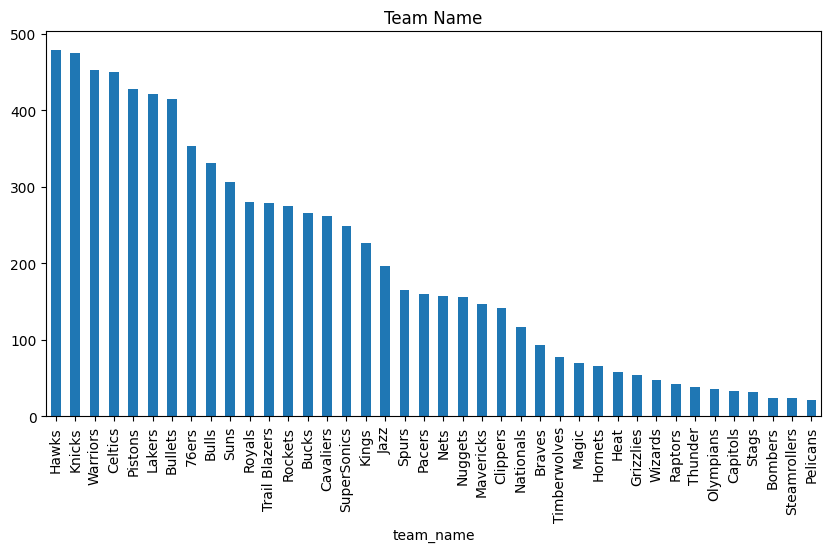

In [13]:
df.team_name.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Team Name")


In [6]:
player=player.dropna(subset='first_name')

In [5]:
player.isnull().sum()

id            0
full_name     0
first_name    6
last_name     0
is_active     0
dtype: int64

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [9]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


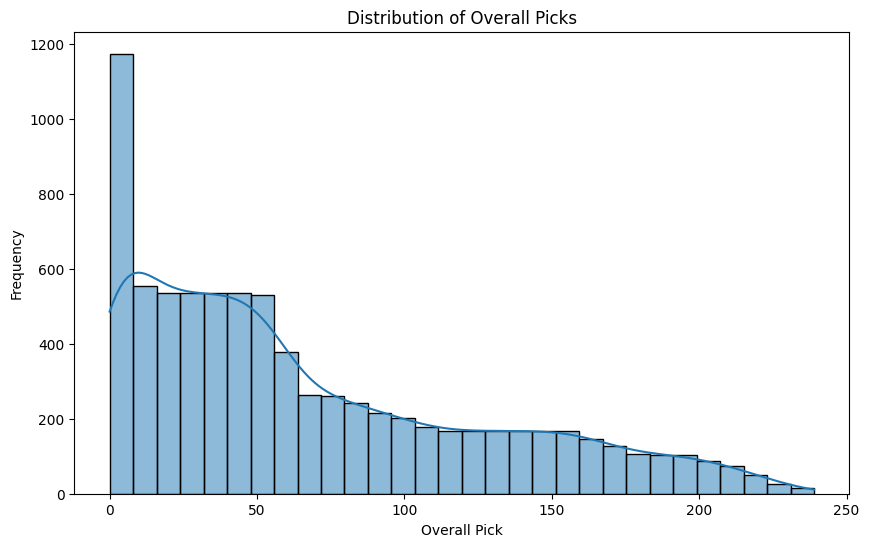

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['overall_pick'], kde=True, bins=30)
plt.title('Distribution of Overall Picks')
plt.xlabel('Overall Pick')
plt.ylabel('Frequency')
plt.show()


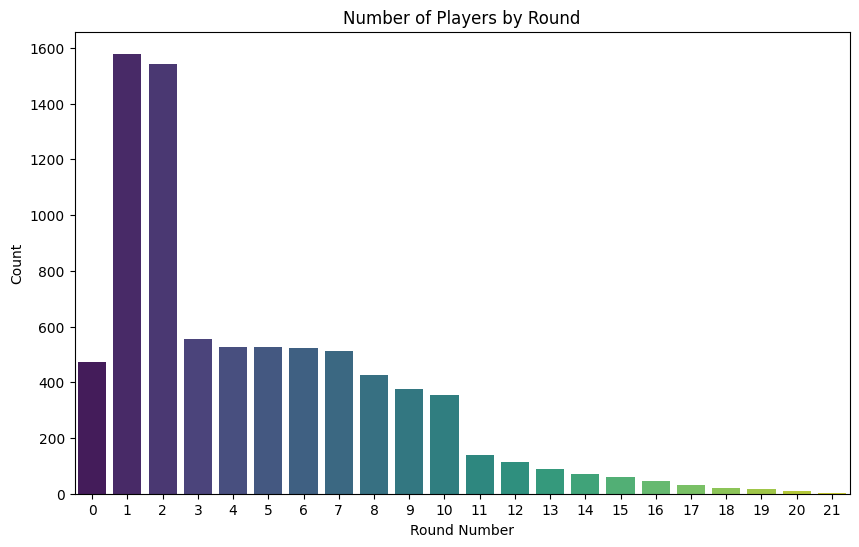

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='round_number', data=df, palette='viridis')
plt.title('Number of Players by Round')
plt.xlabel('Round Number')
plt.ylabel('Count')
plt.show()

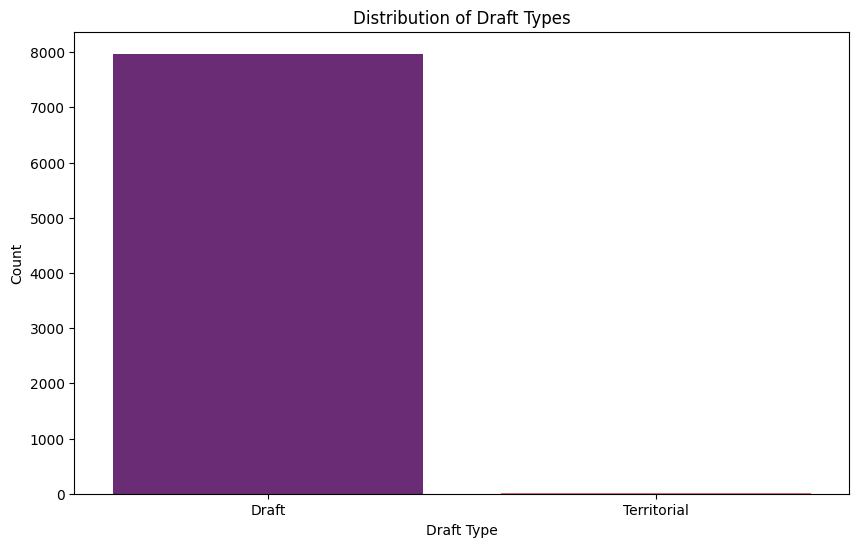

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='draft_type', data=df, palette='magma')
plt.title('Distribution of Draft Types')
plt.xlabel('Draft Type')
plt.ylabel('Count')
plt.show()


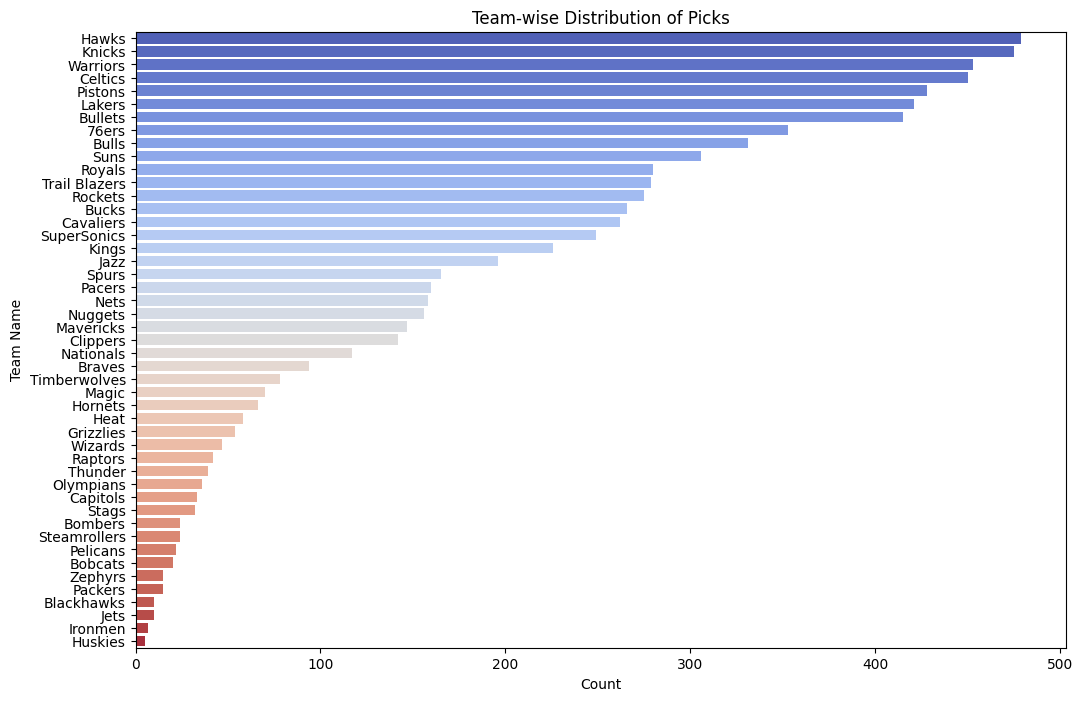

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(y='team_name', data=df, order=df['team_name'].value_counts().index, palette='coolwarm')
plt.title('Team-wise Distribution of Picks')
plt.xlabel('Count')
plt.ylabel('Team Name')
plt.show()


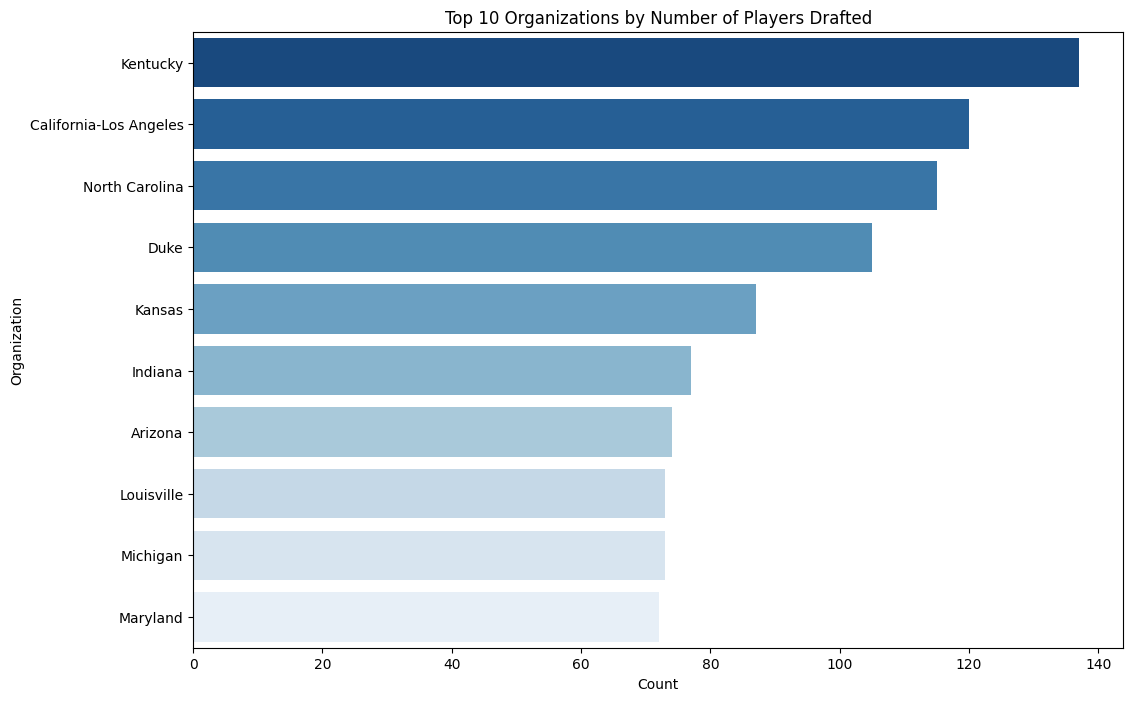

In [13]:
plt.figure(figsize=(12, 8))
top_orgs = df['organization'].value_counts().head(10)
sns.barplot(y=top_orgs.index, x=top_orgs.values, palette='Blues_r')
plt.title('Top 10 Organizations by Number of Players Drafted')
plt.xlabel('Count')
plt.ylabel('Organization')
plt.show()


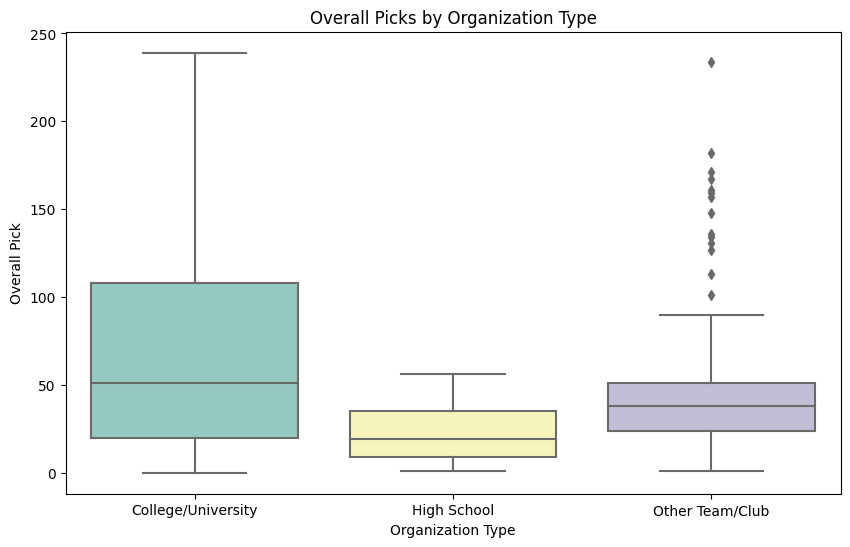

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='organization_type', y='overall_pick', data=df, palette='Set3')
plt.title('Overall Picks by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Overall Pick')
plt.show()
